### aim: 

### date: 

In [98]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [99]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [100]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## manually print out all the LoPs from diad

### map of limiting nutrients and values

In [101]:
yr = 1920
m = 12

def model_LOPS(run,yr,m, d = 0):
    ds = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/{run}/ORCA2_1m_{yr}0101_{yr}1231_diad_T.nc')

    lop = ['lim3fe_', 'lim4po4_', 'lim5si_', 'lim6_din_', 'lim8_light_']
    pft = ['dia', 'mix', 'coc', 'pic', 'pha', 'fix']

    plt.figure()


    fact = 1.5
    fig, axs = plt.subplots(5,6, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    lop = ['lim3fe_', 'lim4po4_', 'lim5si_', 'lim6din_', 'lim8light_']
    pft = ['dia', 'mix', 'coc', 'pic', 'pha', 'fix']

    ind = 0
    for l in lop:
        for p in pft:

            if ((l == 'lim5si_') & (p != 'dia')):
                axs[ind].set_xticks([])
                axs[ind].set_yticks([])
                pass
                # ind = ind+i
                # print(ind)

            else:
                tvar = (f'{l}{p}')
                im = axs[ind].pcolormesh(ds[tvar][m-1,d,:,:], vmin = 0, vmax = 1)
                axs[ind].set_title(f'{tvar}')
                axs[ind].set_xticks([])
                axs[ind].set_yticks([])
            ind = ind+1


    cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.04, pad=0.02)
    plt.suptitle(f'{run} year {yr} month {m} depth {d} model-output lim values')

<Figure size 432x288 with 0 Axes>

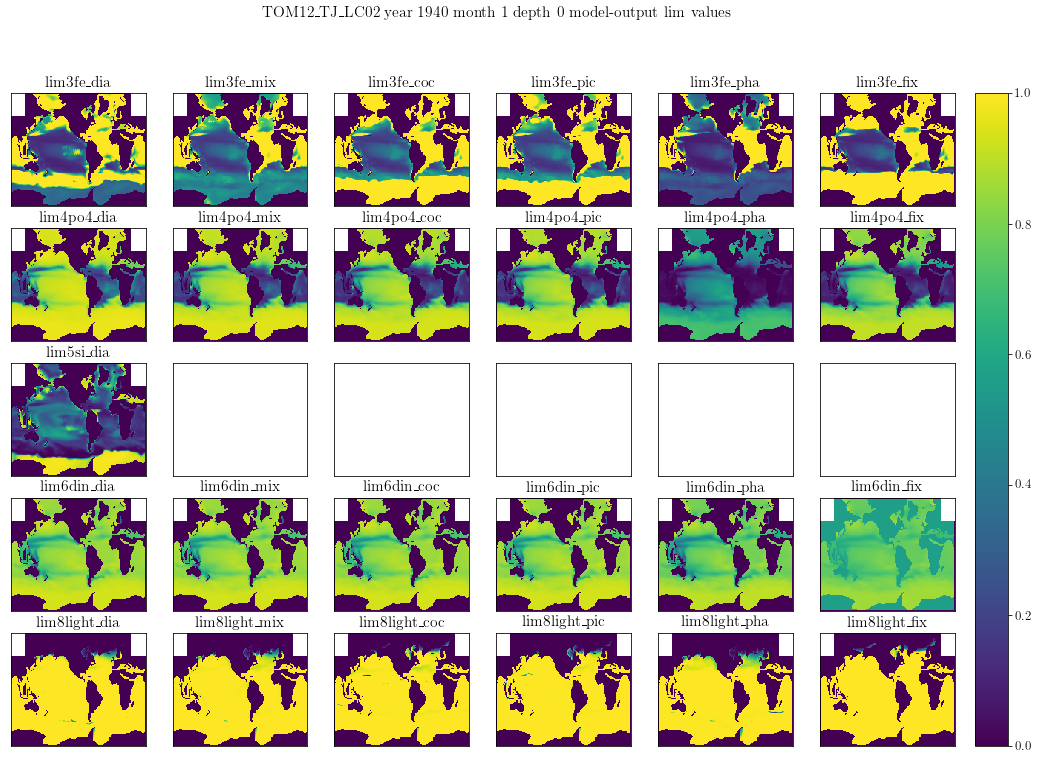

In [102]:
model_LOPS('TOM12_TJ_LC02',1940,1)

In [103]:
yr = 1920
m = 12

def calc_lim(run,yr,m, d = 0):
    ds = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/{run}/ORCA2_1m_{yr}0101_{yr}1231_LoP_T.nc')

    
    LN = ['LN_dia', 'LN_mix', 'LN_coc', 'LN_pic', 'LN_pha', 'LN_fix']
    LV = ['LV_dia', 'LV_mix', 'LV_coc', 'LV_pic', 'LV_pha', 'LV_fix']

    plt.figure()


    fact = 1.5
    fig, axs = plt.subplots(2,6, figsize=(12*fact, 5*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    for i in range(0,6):
        
        lnp = ds[LN[i]][m-1,d,:,:].values
        lvp = ds[LV[i]][m-1,d,:,:].values
        #lnp[np.where(np.isnan(lvp))] = np.nan
        im = axs[i].pcolormesh(lnp, vmin = 3, vmax = 6, cmap = 'Spectral')
        im2 = axs[i+6].pcolormesh(lvp, vmin = 0, vmax = 1, cmap = cm.gray)
        axs[i].set_title(LN[i])
        axs[i+6].set_title(LV[i])
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i+6].set_xticks([])
        axs[i+6].set_yticks([])

    plt.tight_layout()
    cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.04, pad=0.02)
    cbar.set_ticks([3, 4, 5, 6])
    cbar.set_ticklabels(['Fe', 'PO4', 'Si', 'Din'])
    cbar = fig.colorbar(im2, ax=axs, orientation='vertical', fraction=0.04, pad=0.07)
    plt.suptitle(f'{run} year {yr} month {m} depth {d} model-output lim values', y = 1.05)
    

<Figure size 432x288 with 0 Axes>

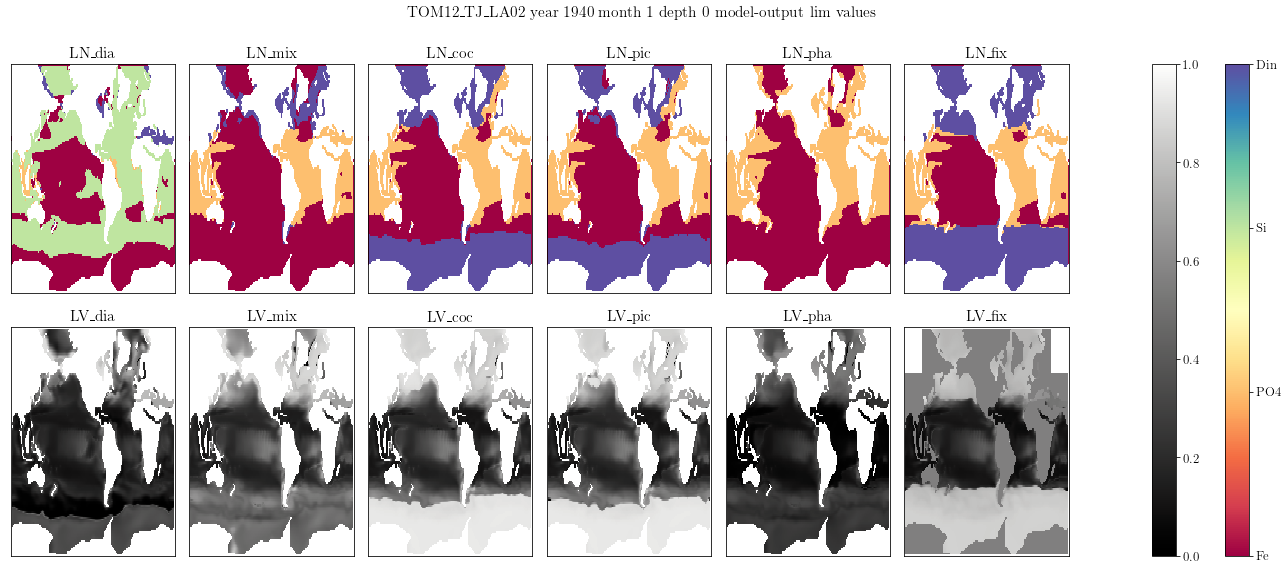

In [104]:
calc_lim('TOM12_TJ_LA02',1940,1)

<Figure size 432x288 with 0 Axes>

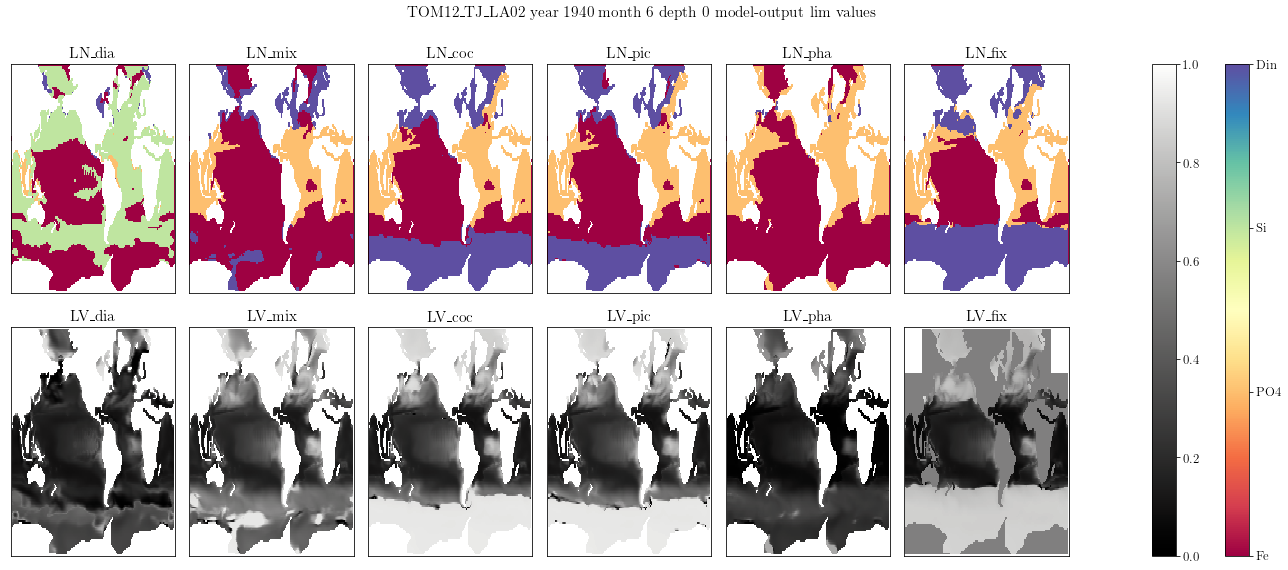

In [105]:
calc_lim('TOM12_TJ_LA02',1940,6)

In [106]:


def make_yearlist(yrst, yrend, dtype, tr, baseDir ='/gpfs/data/greenocean/software/runs/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


LCO2_LoP = xr.open_mfdataset(make_yearlist(1940, 1943, 'LoP', 'TOM12_TJ_LC02', baseDir ='/gpfs/data/greenocean/software/runs/'))
LAO2_LoP = xr.open_mfdataset(make_yearlist(1940, 1943, 'LoP', 'TOM12_TJ_LA02', baseDir ='/gpfs/data/greenocean/software/runs/'))
LCO2_ptrc = xr.open_mfdataset(make_yearlist(1940, 1943, 'ptrc', 'TOM12_TJ_LC02', baseDir ='/gpfs/data/greenocean/software/runs/'))
LAO2_ptrc = xr.open_mfdataset(make_yearlist(1940, 1943, 'ptrc', 'TOM12_TJ_LA02', baseDir ='/gpfs/data/greenocean/software/runs/'))

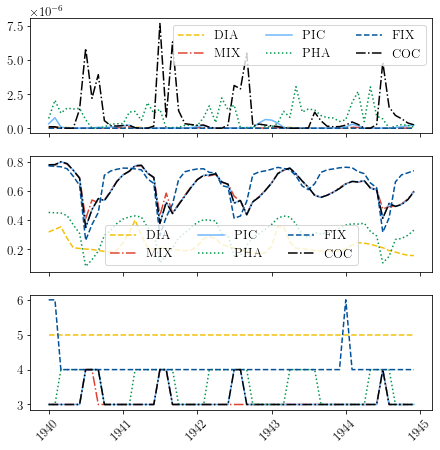

In [112]:


def plot_thing(yr,yre,run,y,x,d=0):
    
    times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')

    LAO2_LoP = xr.open_mfdataset(make_yearlist(yr, yre, 'LoP', run, baseDir ='/gpfs/data/greenocean/software/runs/'))
    LAO2_ptrc = xr.open_mfdataset(make_yearlist(yr, yre, 'ptrc', run, baseDir ='/gpfs/data/greenocean/software/runs/'))

    PFT = ['DIA','MIX','PIC','PHA','FIX','COC',]
    pft = ['dia','mix','pic','pha','fix','coc',]
    metro = ['#f3c108','#de4231','#6db8ff','#02954f','#01529b','k',]
    linestyles = ['--', '-.', '-', ':','--', '-.']
    fact = 0.6
    fig, axs = plt.subplots(3,1, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k', sharex=True)
    axs = axs.ravel()

    for i in range(0,6):
        axs[0].plot(times,LAO2_ptrc[PFT[i]][:,d,y,x], color = metro[i], label = PFT[i], alpha = 1, linestyle = linestyles[i])
        axs[1].plot(times,LAO2_LoP[f'LV_{pft[i]}'][:,d,y,x], color = metro[i], label = PFT[i], alpha = 1, linestyle = linestyles[i])
        axs[2].plot(times,LAO2_LoP[f'LN_{pft[i]}'][:,d,y,x], color = metro[i], label = PFT[i], alpha = 1, linestyle = linestyles[i])
    axs[0].legend(loc = 'best', ncol = 3)
    axs[1].legend(loc = 'best', ncol = 3)

    plt.xticks(rotation=45)
    
plot_thing(1940,1944,'TOM12_TJ_LA02',110,130,d=0)

        
        

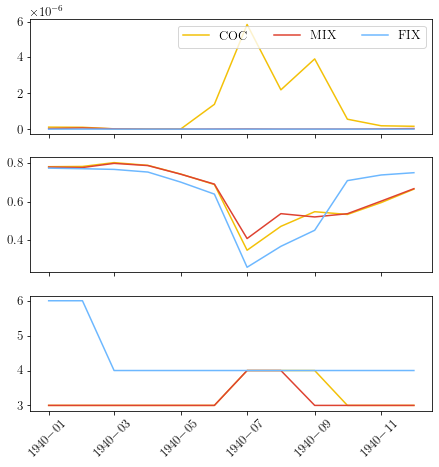

In [108]:
def plot_thing(yr,yre,run,y,x,d=0):
    
    times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')

    LAO2_LoP = xr.open_mfdataset(make_yearlist(yr, yre, 'LoP', run, baseDir ='/gpfs/data/greenocean/software/runs/'))
    LAO2_ptrc = xr.open_mfdataset(make_yearlist(yr, yre, 'ptrc', run, baseDir ='/gpfs/data/greenocean/software/runs/'))

    PFT = ['COC','MIX','FIX','PHA','FIX']
    pft = ['coc','mix','fix','pic','pha','fix']
    metro = ['#f3c108','#de4231','#6db8ff','#02954f','#01529b','k',]

    fact = 0.6
    fig, axs = plt.subplots(3,1, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k', sharex=True)
    axs = axs.ravel()

    for i in range(0,3):
        axs[0].plot(times,LAO2_ptrc[PFT[i]][:,d,y,x], color = metro[i], label = PFT[i])
        axs[1].plot(times,LAO2_LoP[f'LV_{pft[i]}'][:,d,y,x], color = metro[i], label = PFT[i])
        axs[2].plot(times,LAO2_LoP[f'LN_{pft[i]}'][:,d,y,x], color = metro[i], label = PFT[i])
    axs[0].legend(loc = 'best', ncol = 3)

    plt.xticks(rotation=45)
    
plot_thing(1940,1940,'TOM12_TJ_LA02',110,130,d=0)

In [109]:
times

NameError: name 'times' is not defined